In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



## Q 3.1 All Student

## Question B

In [4]:
data_2019 = pd.read_csv("2019data6.csv")
data_2022 = pd.read_csv("2022data6.csv")

In [5]:
data_2019.head()

,Date,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak
0,2019-01-02,26375,1.0,114394,1.0,5534,4.0,19470,4.0
1,2019-01-03,29376,1.0,102094,1.0,5096,4.0,18317,4.0
2,2019-01-04,26248,1.0,135108,1.0,5486,4.0,24030,4.0
3,2019-01-05,10260,1.0,94709,1.0,1563,4.0,15849,4.0
4,2019-01-06,9628,1.0,49432,1.0,1608,4.0,8007,4.0


In [6]:
data_2022.head()

,Date and time,Mode,Distance,Duration,Price
0,2022-08-01 17:31,Bus,1.3,0.04,1.0
1,2022-03-15 09:22,Bus,4.0,0.14,1.0
2,2022-05-06 15:24,Bus,1.3,0.04,1.0
3,2022-02-19 21:09,Bus,2.1,0.09,1.0
4,2022-12-20 11:23,Bus,2.4,0.09,1.0


In [7]:
#statistical insights 
data_2019.describe()





,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak
count,361.000000,361.0,361.000000,361.0,361.000000,361.0,361.000000,361.0
mean,20429.831025,1.0,85393.700831,1.0,3697.224377,4.0,14949.360111,4.0
std,8045.906384,0.0,21886.214702,0.0,1561.128622,0.0,4109.509133,0.0
min,6155.000000,1.0,33678.000000,1.0,989.000000,4.0,5293.000000,4.0
25%,9504.000000,1.0,76544.000000,1.0,1533.000000,4.0,13187.000000,4.0
50%,23686.000000,1.0,88494.000000,1.0,4330.000000,4.0,15458.000000,4.0
75%,26526.000000,1.0,97706.000000,1.0,4915.000000,4.0,17562.000000,4.0
max,35535.000000,1.0,140798.000000,1.0,5717.000000,4.0,26569.000000,4.0


In [8]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and time  20000 non-null  object 
 1   Mode           20000 non-null  object 
 2   Distance       20000 non-null  float64
 3   Duration       20000 non-null  float64
 4   Price          20000 non-null  float64
dtypes: float64(3), object(2)
memory usage: 781.4+ KB


In [9]:
data_2022.describe()

,Distance,Duration,Price
count,20000.000000,20000.000000,20000.000000
mean,2.829525,0.064854,3.318600
std,2.157216,0.044023,2.816823
min,0.200000,0.000000,1.000000
25%,1.100000,0.030000,1.000000
50%,2.100000,0.060000,1.500000
75%,4.000000,0.090000,4.000000
max,9.200000,1.720000,8.000000


In [10]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and time  20000 non-null  object 
 1   Mode           20000 non-null  object 
 2   Distance       20000 non-null  float64
 3   Duration       20000 non-null  float64
 4   Price          20000 non-null  float64
dtypes: float64(3), object(2)
memory usage: 781.4+ KB


In [11]:
print(data_2022.columns)

Index(['Date and time', 'Mode', 'Distance', 'Duration', 'Price'], dtype='object')


C:\Users\Acer.LAPTOP-TH13B70O\AppData\Local\Temp\ipykernel_25620\1600889052.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '170509.33333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_2019.loc[mask_missing, 'Total Passengers'] = avg_next_days


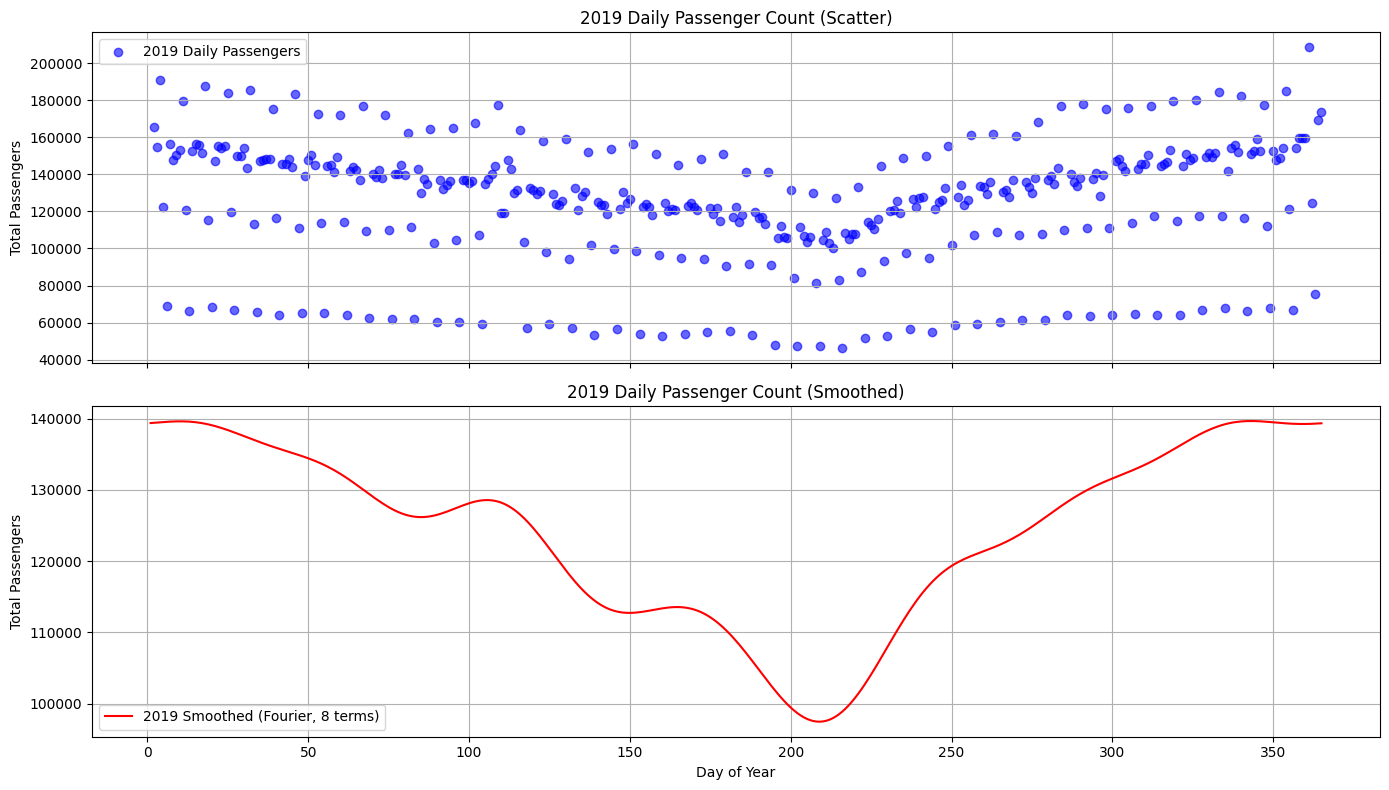

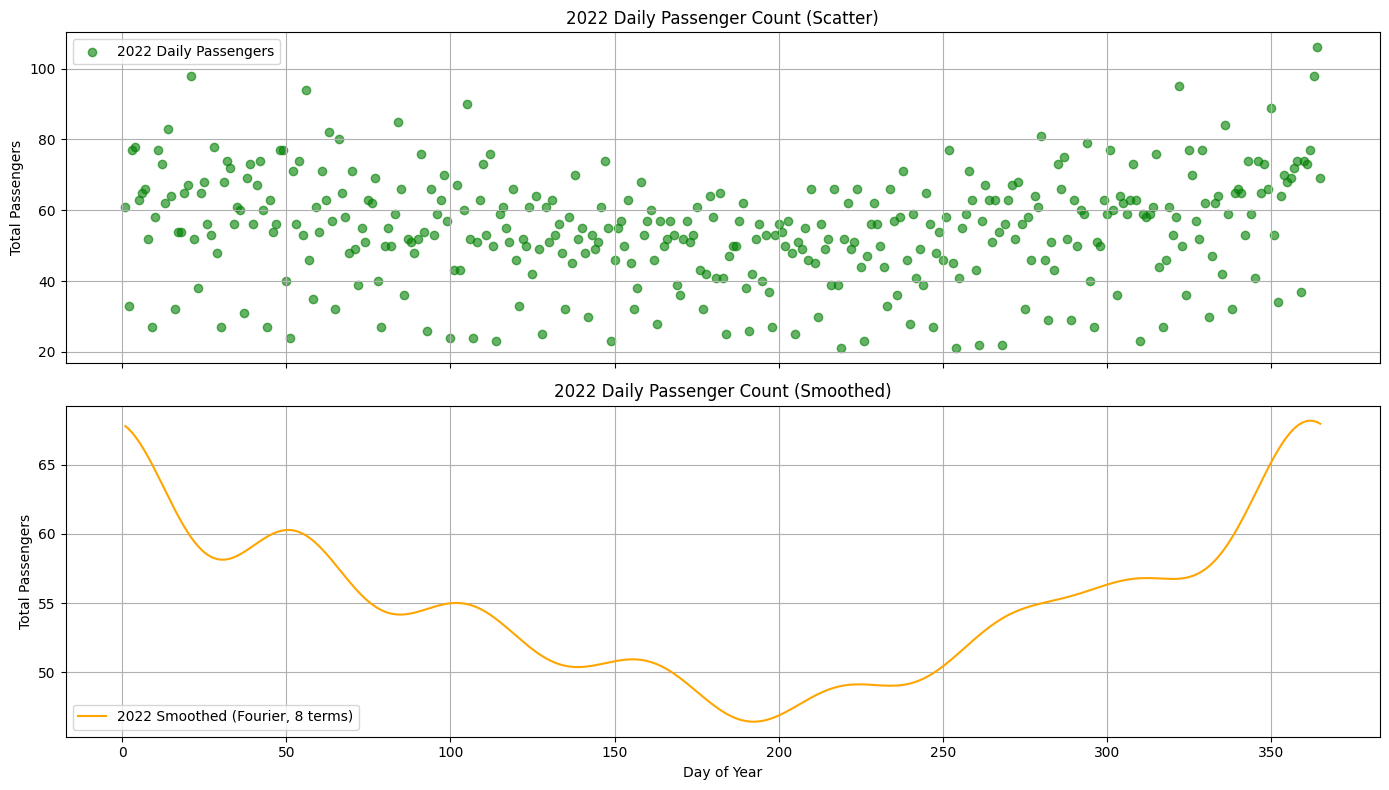

In [12]:

# ----------------------------------------
# Fourier smoothing function
# ----------------------------------------
def fourier_smooth(series, n_terms=8):
    y = series.values
    fft = np.fft.fft(y)
    fft[n_terms:-n_terms] = 0
    return np.fft.ifft(fft).real

# ----------------------------------------
# PROCESS 2019 DATA
# ----------------------------------------
data_2019['Date'] = pd.to_datetime(data_2019['Date'])
data_2019['Day of Year'] = data_2019['Date'].dt.dayofyear
data_2019['Total Passengers'] = (
    data_2019['Bus pax number peak'] +
    data_2019['Bus pax number offpeak'] +
    data_2019['Metro pax number peak'] +
    data_2019['Metro pax number offpeak']
)

# Fill 2019-01-01 using avg of Jan 2–4
mask_missing = data_2019['Total Passengers'] == "2019-01-01"
avg_next_days = data_2019[
    (data_2019['Date'] >= "2019-01-02") &
    (data_2019['Date'] <= "2019-01-04")
]['Total Passengers'].mean()
data_2019.loc[mask_missing, 'Total Passengers'] = avg_next_days

# Align to full year 1–365
daily_2019 = data_2019.set_index("Day of Year")["Total Passengers"].sort_index()
daily_2019 = daily_2019.reindex(np.arange(1, 366), method="ffill")

# Clean for smoothing
daily_2019_clean = pd.to_numeric(daily_2019, errors="coerce").fillna(0)
smooth_2019 = fourier_smooth(daily_2019_clean)

# ----------------------------------------
# PROCESS 2022 DATA
# ----------------------------------------
data_2022['Date and time'] = pd.to_datetime(data_2022['Date and time'])
data_2022['Day of Year'] = data_2022['Date and time'].dt.dayofyear

daily_2022 = data_2022.groupby('Day of Year').size()
daily_2022 = daily_2022.reindex(np.arange(1, 366), fill_value=0)

smooth_2022 = fourier_smooth(daily_2022)

# ----------------------------------------
# PLOT 2019 FIGURE
# ----------------------------------------
days = np.arange(1, 366)
fig1, axs1 = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Scatter 2019
axs1[0].scatter(days, daily_2019, alpha=0.6, color='blue', label='2019 Daily Passengers')
axs1[0].set_title('2019 Daily Passenger Count (Scatter)')
axs1[0].set_ylabel('Total Passengers')
axs1[0].legend()
axs1[0].grid(True)

# Smoothed 2019
axs1[1].plot(days, smooth_2019, color='red', label='2019 Smoothed (Fourier, 8 terms)')
axs1[1].set_title('2019 Daily Passenger Count (Smoothed)')
axs1[1].set_xlabel('Day of Year')
axs1[1].set_ylabel('Total Passengers')
axs1[1].legend()
axs1[1].grid(True)

plt.tight_layout()
plt.show()

# ----------------------------------------
# PLOT 2022 FIGURE
# ----------------------------------------
fig2, axs2 = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Scatter 2022
axs2[0].scatter(days, daily_2022, alpha=0.6, color='green', label='2022 Daily Passengers')
axs2[0].set_title('2022 Daily Passenger Count (Scatter)')
axs2[0].set_ylabel('Total Passengers')
axs2[0].legend()
axs2[0].grid(True)

# Smoothed 2022
axs2[1].plot(days, smooth_2022, color='orange', label='2022 Smoothed (Fourier, 8 terms)')
axs2[1].set_title('2022 Daily Passenger Count (Smoothed)')
axs2[1].set_xlabel('Day of Year')
axs2[1].set_ylabel('Total Passengers')
axs2[1].legend()
axs2[1].grid(True)

plt.tight_layout()
plt.show()


In [13]:
sorted_data = data_2019.sort_values(by='Date')
sorted_data.head()  # View the 5 rows with the lowest values


,Date,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak,Day of Year,Total Passengers
0,2019-01-02,26375,1.0,114394,1.0,5534,4.0,19470,4.0,2,165773.0
1,2019-01-03,29376,1.0,102094,1.0,5096,4.0,18317,4.0,3,154883.0
2,2019-01-04,26248,1.0,135108,1.0,5486,4.0,24030,4.0,4,190872.0
3,2019-01-05,10260,1.0,94709,1.0,1563,4.0,15849,4.0,5,122381.0
4,2019-01-06,9628,1.0,49432,1.0,1608,4.0,8007,4.0,6,68675.0


In [14]:
sorted_data = data_2022.sort_values(by='Day of Year')
sorted_data.head()  # View the 5 rows with the lowest values


,Date and time,Mode,Distance,Duration,Price,Day of Year
10301,2022-01-01 07:57:00,Metro,2.4,0.04,4.0,1
17779,2022-01-01 16:12:00,Metro,3.4,0.05,4.0,1
16559,2022-01-01 21:03:00,Metro,1.1,0.01,2.0,1
4049,2022-01-01 23:26:00,Bus,1.0,0.04,1.0,1
5669,2022-01-01 12:09:00,Bus,0.7,0.03,1.0,1


## Question C

In [39]:
def plot_bar_avgpax_weekdays(data_2019,data_2022,X_spring, Y_summer, Z_autumn):
    # convert 'Date' to date time and extract week days
    #data_2019['Date']= pd.to_datetime(data_2019)
    # data_2022['Date and time'] = pd.to_datetime(data_2022['Date and time'])

    #extract the week days of the date time 
    data_2019['DayOfWeek_2019'] = data_2019['Date'].dt.day_name()
    data_2022['DayOfWeek_2022'] = data_2022['Date and time'].dt.day_name()

    # #calculate the total passenger for 2019 according to each day 
    # data_2019['Total Passengers'] = (
    # data_2019['Bus pax number peak'] + data_2019['Bus pax number offpeak'] +
    # data_2019['Metro pax number peak'] + data_2019['Metro pax number offpeak']

   
    #calculate the avg. passengers per week day 
    avg_passengers_2019 = data_2019.groupby('DayOfWeek_2019')['Total Passengers'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
   
    #count trips per day 
    daily_counts_2022 = data_2022.groupby(['Day of Year','DayOfWeek_2022']).size().reset_index(name = 'Trips')


    # Compute average number of trips per weekday
    avg_passengers_2022 = daily_counts_2022.groupby('DayOfWeek_2022')['Trips'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])

    
    print("Avg 2019")
    print(avg_passengers_2019)
    print("Avg 2022")
    print(avg_passengers_2022)


    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(20,15))

    # --- 2019 Plot ---
    bars_2019 = axes[0].bar(avg_passengers_2019.index, avg_passengers_2019.values)
    for bar in bars_2019:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, height + 2000, f'{height:,.0f}', 
                    ha='center', va='bottom')
    
    # Add X value (spring percentage) as annotation text
    x_value_text = f"X = {X_spring:.2f}% of total journeys occurred in spring for 2019"
    y_value_text = f"Y = {Y_summer:.2f}% of total journeys occurred in summer for 2019"
    z_value_text = f"Z = {Z_autumn:.2f}% of total journeys occurred in autumn for 2019"
    
    # X Y Z values on the graph
    # All three annotations on the left (2019) subplot
    # All three annotations on the left (2019) subplot
    axes[0].annotate(
        x_value_text,
        xy=(0.5, 1.14), xycoords='axes fraction', fontsize=11,
        ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray')
    )

    axes[0].annotate(
        y_value_text,
        xy=(0.5, 1.08), xycoords='axes fraction', fontsize=11,
        ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray')
    )

    axes[0].annotate(
        z_value_text,
        xy=(0.5, 1.02), xycoords='axes fraction', fontsize=11,
        ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray')
    )


    axes[0].set_title('Average Passengers by Day (2019)')
    axes[0].set_xlabel('Day of the Week')
    axes[0].set_ylabel('Average Number of Passengers')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # --- 2022 Plot ---
    bars_2022 = axes[1].bar(avg_passengers_2022.index, avg_passengers_2022.values)
    for bar in bars_2022:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', 
                    ha='center', va='bottom')

    axes[1].set_title('Average Passengers by Day (2022)')
    axes[1].set_xlabel('Day of the Week')
    axes[1].set_ylabel('Average Number of Passengers')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Layout and display
    plt.suptitle('Figure2: Comparison of Average Public Transport Passengers by Day (2019 vs 2022)', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Question 3.2 

In [16]:
data_2019

,Date,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak,Day of Year,Total Passengers
0,2019-01-02,26375,1.0,114394,1.0,5534,4.0,19470,4.0,2,165773.0
1,2019-01-03,29376,1.0,102094,1.0,5096,4.0,18317,4.0,3,154883.0
2,2019-01-04,26248,1.0,135108,1.0,5486,4.0,24030,4.0,4,190872.0
3,2019-01-05,10260,1.0,94709,1.0,1563,4.0,15849,4.0,5,122381.0
4,2019-01-06,9628,1.0,49432,1.0,1608,4.0,8007,4.0,6,68675.0
...,...,...,...,...,...,...,...,...,...,...,...
356,2019-12-27,35535,1.0,140798,1.0,5612,4.0,26569,4.0,361,208514.0
357,2019-12-28,9827,1.0,96838,1.0,1662,4.0,16422,4.0,362,124749.0
358,2019-12-29,9923,1.0,55258,1.0,1587,4.0,8483,4.0,363,75251.0
359,2019-12-30,31319,1.0,112178,1.0,5613,4.0,20036,4.0,364,169146.0


In [17]:
data_2022

,Date and time,Mode,Distance,Duration,Price,Day of Year
0,2022-08-01 17:31:00,Bus,1.3,0.04,1.0,213
1,2022-03-15 09:22:00,Bus,4.0,0.14,1.0,74
2,2022-05-06 15:24:00,Bus,1.3,0.04,1.0,126
3,2022-02-19 21:09:00,Bus,2.1,0.09,1.0,50
4,2022-12-20 11:23:00,Bus,2.4,0.09,1.0,354
...,...,...,...,...,...,...
19995,2022-01-03 09:24:00,Metro,4.0,0.04,4.0,3
19996,2022-11-18 14:26:00,Metro,4.9,0.09,8.0,322
19997,2022-10-21 16:20:00,Metro,1.7,0.03,4.0,294
19998,2022-05-31 18:39:00,Metro,4.4,0.08,8.0,151


In [ ]:
#bus,tram,train->question
#bus,metro-> dataset
#make tram into metro 

def transport_type_seasonwise_plot(data_2019,data_2022):
   # --- Process 2019 data ---
    data_2019['Date'] = pd.to_datetime(data_2019['Date'])
    
    # --- Total passenger for 2019, according to transport ---
    data_2019['Total_Bus'] = data_2019['Bus pax number peak'] + data_2019['Bus pax number offpeak']
    data_2019['Total_Tram'] = data_2019['Metro pax number peak'] + data_2019['Metro pax number offpeak']  # Tram = Metro 

    total_2019_bus = data_2019['Total_Bus'].sum()
    total_2019_tram = data_2019['Total_Tram'].sum()
    total_2019_all = total_2019_bus + total_2019_tram
    
    # Fractions for 2019
    percent_2019_bus = (total_2019_bus / total_2019_all) * 100
    percent_2019_tram = (total_2019_tram / total_2019_all) * 100
    percent_2019_train = 0  # No train data in 2019

    # --- Process 2022 data ---
    data_2022['Date and time'] = pd.to_datetime(data_2022['Date and time'])
    mode_counts_2022 = data_2022['Mode'].value_counts()
    total_2022_all = mode_counts_2022.sum()

    bus_2022 = mode_counts_2022.get('Bus', 0)
    tram_2022 = mode_counts_2022.get('Metro', 0)
    train_2022 = mode_counts_2022.get('Train', 0)

    percent_2022_bus = (bus_2022 / total_2022_all) * 100
    percent_2022_tram = (tram_2022 / total_2022_all) * 100
    percent_2022_train = (train_2022 / total_2022_all) * 100

    # Combine into DataFrame
    transport_df = pd.DataFrame({
        '2019': [percent_2019_bus, percent_2019_tram, percent_2019_train],
        '2022': [percent_2022_bus, percent_2022_tram, percent_2022_train]
    }, index=['Bus', 'Tram', 'Train'])

    print(transport_df)

    # --- Calculate X, Y, Z values for 2019: seasonal journey percentages ---
    ## define seasonal months 
    spring_months = [3,4,5] # March, April, May
    summer_months = [6,7,8] #June, July, August
    autumn_months =  [9,10,11] #September, October, November

    data_2019['Month'] = data_2019['Date'].dt.month 

    #Total Journeys 
    total_journeys_2019 = (data_2019['Total_Bus']  + data_2019['Total_Tram']).sum()

    #Seasonal journey totals 
    spring_total = data_2019[data_2019['Month'].isin(spring_months)][['Total_Bus', 'Total_Tram']].sum().sum()
    summer_total = data_2019[data_2019['Month'].isin(summer_months)][['Total_Bus', 'Total_Tram']].sum().sum()
    autumn_total = data_2019[data_2019['Month'].isin(autumn_months)][['Total_Bus', 'Total_Tram']].sum().sum()


    # Compute percentages
    X_spring = (spring_total / total_journeys_2019) * 100
    Y_summer = (summer_total / total_journeys_2019) * 100
    Z_autumn = (autumn_total / total_journeys_2019) * 100

    print(f"2019_Spring Percentage: {X_spring:.2f}%")
    print(f"2019_Summer_percentage:{Y_summer:.2f}%")
    print(f"2019_Autumn_percentage:{Z_autumn:.2f}%")

    plot_bar_avgpax_weekdays(data_2019,data_2022,X_spring,Y_summer,Z_autumn)


    # Create bar chart with both 2019 and 2022 mode share
    fig, ax = plt.subplots(figsize=(10, 6))

    modes = transport_df.index
    x = range(len(modes))
    bar_width = 0.35

    # Plot bars
    bars_2019 = ax.bar([i - bar_width / 2 for i in x], transport_df['2019'], width=bar_width, label='2019')
    bars_2022 = ax.bar([i + bar_width / 2 for i in x], transport_df['2022'], width=bar_width, label='2022')

    # Add labels
    for bar in bars_2019 + bars_2022:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

    # Configure plot
    ax.set_title('Figure 4: Percentage of Journeys by Mode (2019 vs 2022)')
    ax.set_xlabel('Mode of Transport')
    ax.set_ylabel('Percentage of Journeys (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(modes)
    ax.set_ylim(0, 100)
    ax.legend()

    # Add student ID
    student_id = "24157966"  # Replace with actual student ID if needed
    plt.text(1, -15, f'Student ID: {student_id}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()






            2019  2022
Bus    85.019228  50.0
Tram   14.980772  50.0
Train   0.000000   0.0
2019_Spring Percentage: 25.26%
2019_Summer_percentage:21.86%
2019_Autumn_percentage:26.03%
Avg 2019
DayOfWeek_2019
Monday       135100.173077
Tuesday      135471.903846
Wednesday    134096.647059
Thursday     134462.843137
Friday       165215.692308
Saturday     105916.846154
Sunday        60167.411765
Name: Total Passengers, dtype: float64
Avg 2022
DayOfWeek_2022
Monday       57.096154
Tuesday      58.269231
Wednesday    59.307692
Thursday     56.769231
Friday       72.153846
Saturday     50.830189
Sunday       29.211538
Name: Trips, dtype: float64


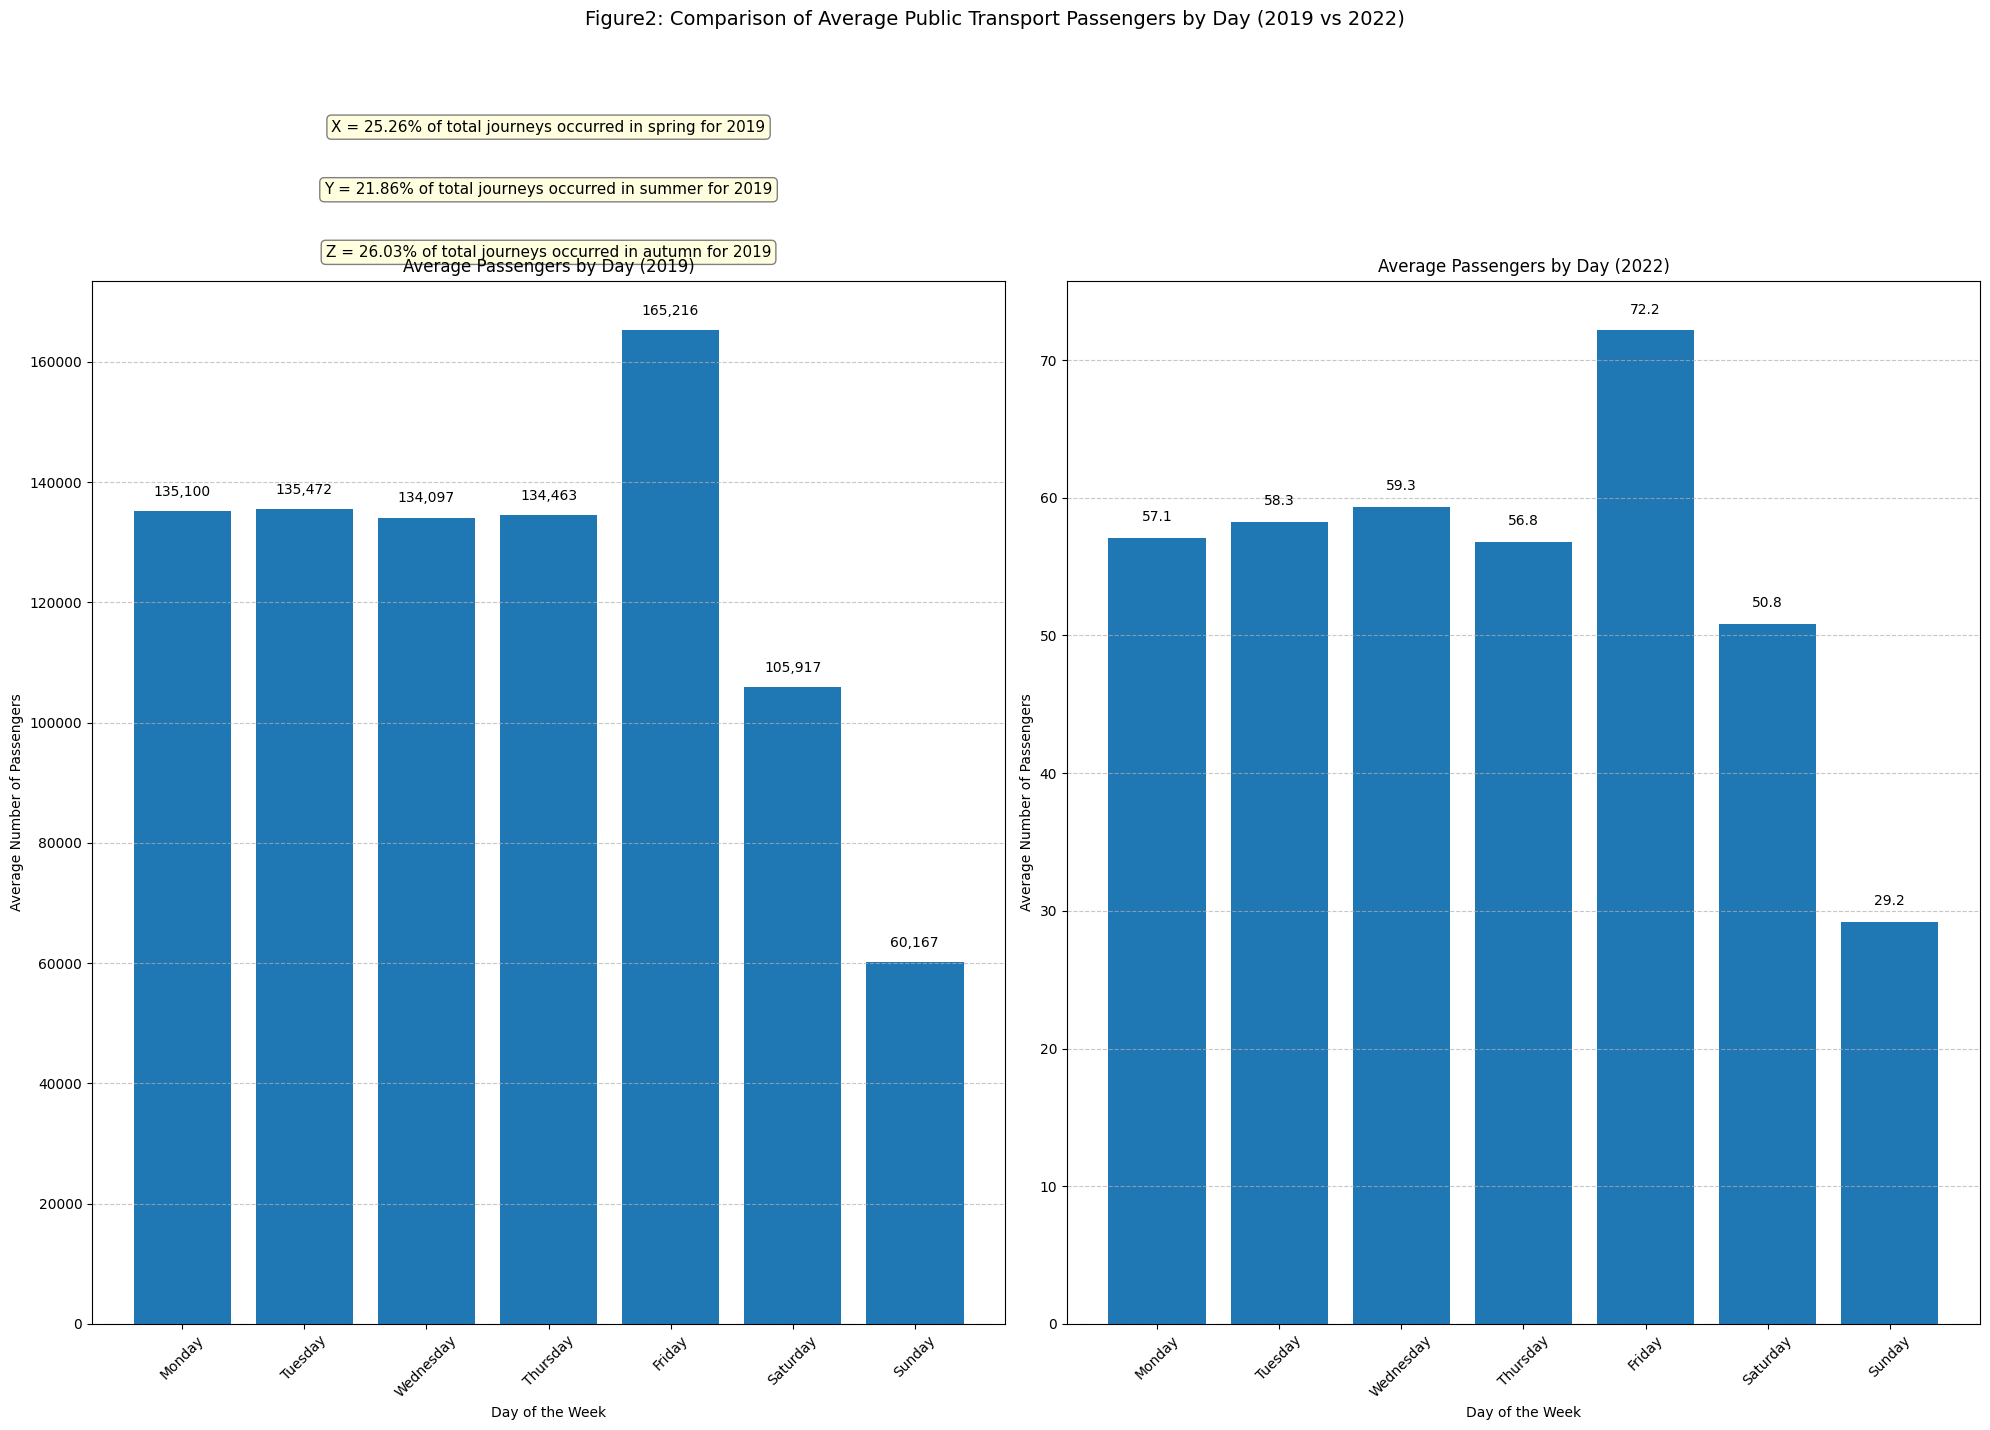

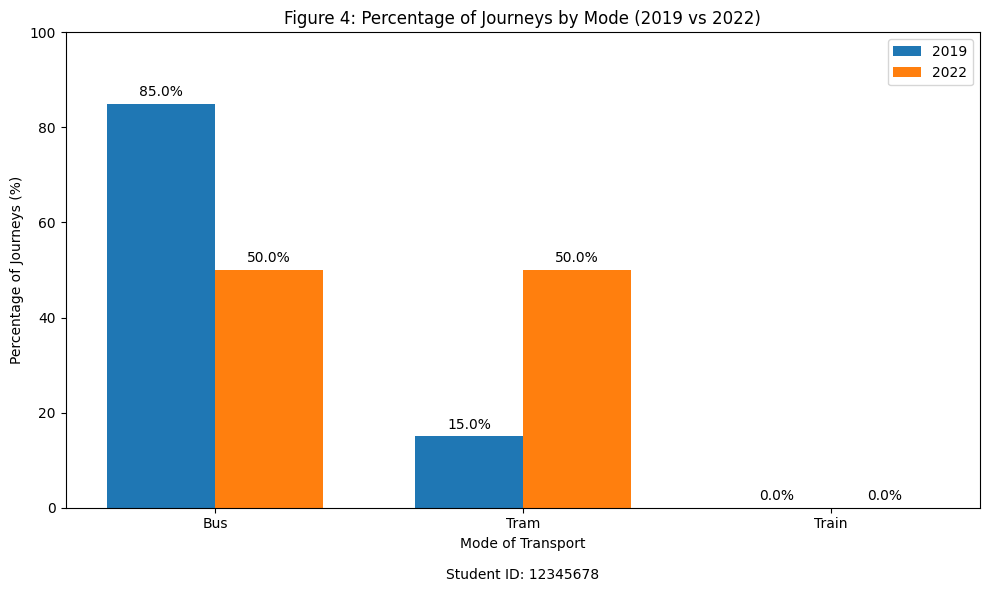

In [40]:
transport_type_seasonwise_plot(data_2019,data_2022)
